In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
import math
import warnings
warnings.filterwarnings('ignore')

import re
from colorama import Fore, Style
from yellowbrick.style import set_palette
set_palette('flatui')

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.float_format', '{:.3f}'.format)


In [455]:
train = pd.read_csv('c:/data/titanic/train.csv')
test = pd.read_csv('c:/data/titanic/test.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [22]:
print('The numbers of null in train file :\n{}'.format(train.isnull().sum()))
print('\nThe numbers of null in test file :\n{}'.format(test.isnull().sum()))

The numbers of null in train file :
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The numbers of null in test file :
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [25]:
print('The numbers of duplicated rows in train file :\n{}'.format(train.duplicated().sum()))
print('\nThe numbers of duplicated rows in test file :\n{}'.format(test.duplicated().sum()))

The numbers of duplicated rows in train file :
0

The numbers of duplicated rows in test file :
0


In [31]:
print('The numbers of unique values in train file :\n{}'.format(train.nunique()))
print('\nThe numbers of unique values in test file :\n{}'.format(test.nunique()))

The numbers of unique values in train file :
PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

The numbers of unique values in test file :
PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64


### Check the correlation with each features

In [36]:
train.corr().round(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


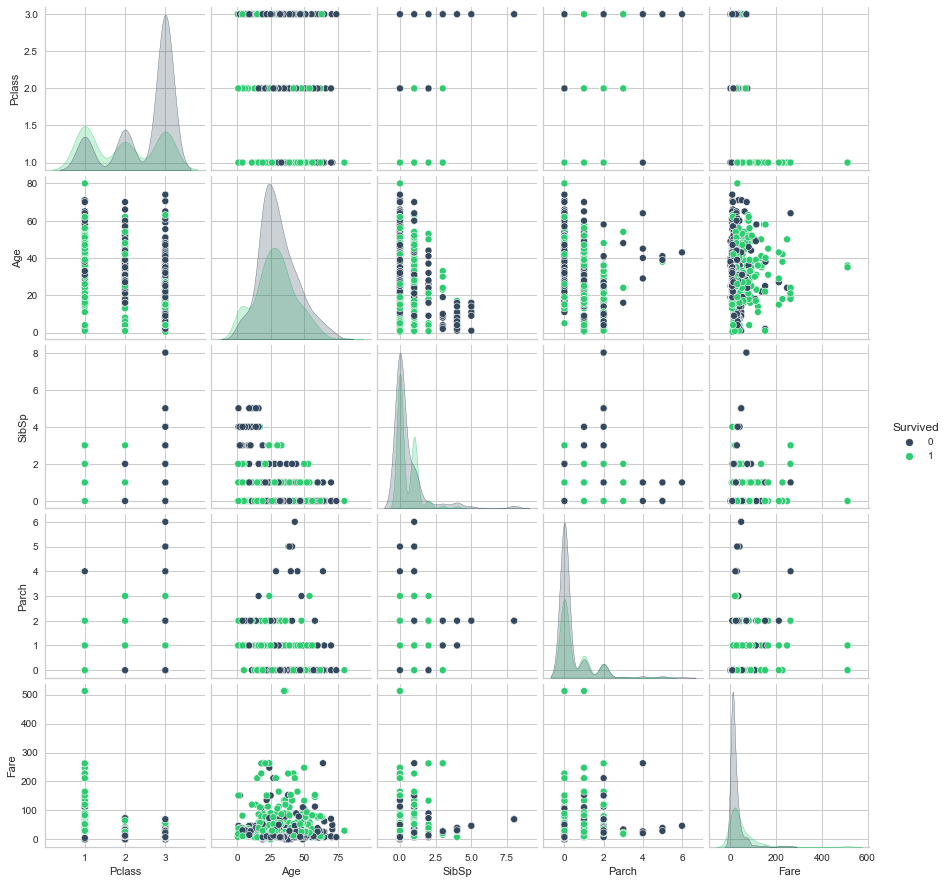

In [37]:
sns.pairplot(train.iloc[:,1:],hue='Survived');

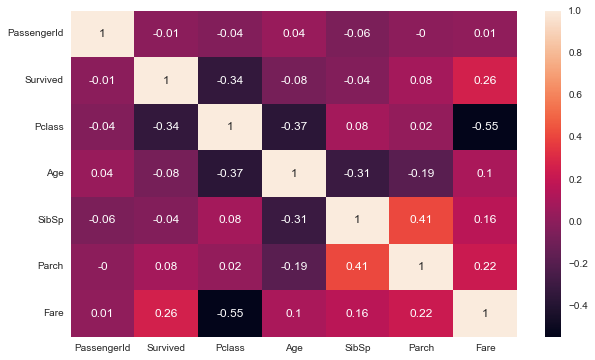

In [42]:
sns.heatmap(train.corr().round(2),annot=True);

In [29]:
train.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

## Features

### Pclass

In [203]:
s_pclass =train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean()
s_pclass

,Pclass,Survived
0,1,0.630
1,2,0.473
2,3,0.242


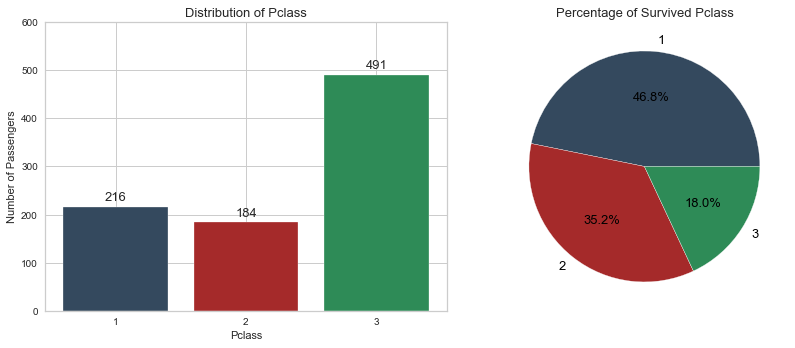

In [204]:
x = train_data['Pclass'].value_counts().index
y = train_data['Pclass'].value_counts().values

plt.figure(figsize=(12,5))
plt.subplot(121)
g = plt.bar(x,y,label='Pclass',color=['seagreen','#34495E', 'brown'])
plt.bar_label(g, padding=3, size=13), plt.ylim(0, 600)
plt.xticks(range(1,4))

plt.xlabel('Pclass'), plt.ylabel('Number of Passengers') 
plt.title('Distribution of Pclass', size=13)
   
plt.subplot(122)
plt.pie(s_pclass.Survived, labels=s_pclass.Pclass, autopct='%0.1f%%', radius=1.0, textprops={'color':'black','fontsize': 13},
       colors=['#34495E', 'brown','seagreen'])
plt.title('Percentage of Survived Pclass', size=13)

plt.tight_layout();

### Sex

In [205]:
s_sex = train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean()
s_sex

,Sex,Survived
0,female,0.742
1,male,0.189


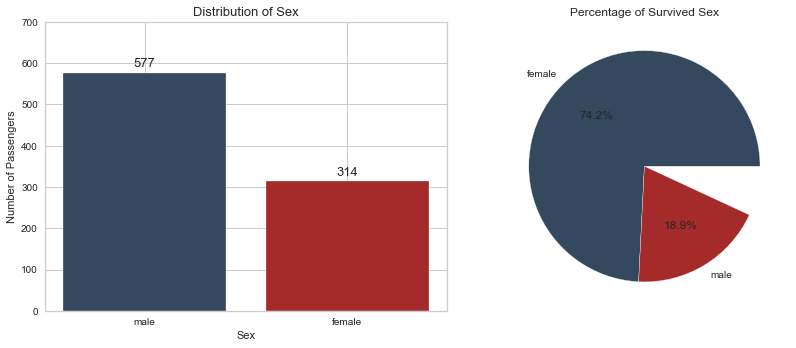

In [206]:
x_sex = train.Sex.value_counts().index
y_sex = train.Sex.value_counts().values

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
g = plt.bar(x_sex,y_sex,label='Sex',color=['#34495E','brown'])
plt.bar_label(g,padding=3,size=13), plt.ylim(0,700);
plt.xlabel('Sex'),plt.ylabel('Number of Passengers')
plt.title('Distribution of Sex', size=13)

plt.subplot(1,2,2)
plt.pie(s_sex.Survived,labels=s_sex.Sex,autopct='%0.1f%%',radius=1.0,colors=['#34495E','brown'])
plt.title('Percentage of Survived Sex')

plt.tight_layout()

### Age

In [210]:
train[train.Age.isnull()].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,177.000,177.000,177.000,0.000,177.000,177.000,177.000
mean,435.582,0.294,2.599,NaN,0.565,0.181,22.159
std,250.553,0.457,0.763,NaN,1.626,0.534,31.875
min,6.000,0.000,1.000,NaN,0.000,0.000,0.000
25%,230.000,0.000,3.000,NaN,0.000,0.000,7.750
50%,452.000,0.000,3.000,NaN,0.000,0.000,8.050
75%,634.000,1.000,3.000,NaN,0.000,0.000,24.150
max,889.000,1.000,3.000,NaN,8.000,2.000,227.525


Pick the Sibsp, Parch for setting missing age due to there are small variance.

In [211]:
train.groupby(['SibSp','Parch']).Age.mean()

SibSp  Parch
0      0       32.220
       1       29.525
       2       20.993
       3       24.000
       4       29.000
       5       40.000
1      0       32.069
       1       27.065
       2       20.466
       3       39.333
       4       49.667
       5       38.667
       6       43.000
2      0       31.846
       1        8.357
       2       17.250
       3       24.000
3      0       31.500
       1        4.333
       2       13.000
4      1        6.778
       2        7.333
5      2       10.200
8      2          NaN
Name: Age, dtype: float64

In [456]:
train.Age.fillna(train.groupby(['SibSp','Parch']).Age.transform('mean'), inplace=True)

In [457]:
train.Age.fillna(train[train.SibSp>4].Age.mean(), inplace=True)

In [458]:
train[train.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [459]:
test.Age.fillna(test.groupby(['SibSp','Parch']).Age.transform('mean'), inplace=True)

In [460]:
test.Age.fillna(test[test.SibSp<2].Age.mean(), inplace=True)

In [461]:
test[test.Age.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [462]:
full_data = (train, test)
for dataset in full_data:
    age_avg    = dataset['Age'].mean()
    age_std    = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)


In [436]:
pd.cut(train['Age'], 5)

0      (16.0, 32.0]
1      (32.0, 48.0]
2      (16.0, 32.0]
3      (32.0, 48.0]
4      (32.0, 48.0]
           ...     
886    (16.0, 32.0]
887    (16.0, 32.0]
888    (16.0, 32.0]
889    (16.0, 32.0]
890    (16.0, 32.0]
Name: Age, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

In [463]:
train['CategoricalAge'] = pd.cut(train['Age'], 5)

In [414]:
print(train[['CategoricalAge','Survived']].groupby(['CategoricalAge'],as_index=False).mean())

  CategoricalAge  Survived
0  (-0.08, 16.0]     0.495
1   (16.0, 32.0]     0.352
2   (32.0, 48.0]     0.403
3   (48.0, 64.0]     0.435
4   (64.0, 80.0]     0.091


In [253]:
s_age = train[['CategoricalAge','Survived']].groupby(['CategoricalAge'],as_index=False).mean()
s_age

,CategoricalAge,Survived
0,"(-0.08, 16.0]",0.495
1,"(16.0, 32.0]",0.352
2,"(32.0, 48.0]",0.403
3,"(48.0, 64.0]",0.435
4,"(64.0, 80.0]",0.091


### Name
Inside this feature we can find the title of people

In [257]:
train.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [464]:
def get_title(name):
    title_search = re.search('[A-z]+\.',name)
    if title_search:
        return title_search.group(0)
    else:
        return ''

In [465]:
for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

print(pd.crosstab(train['Title'], train['Sex']))

Sex        female  male
Title                  
Capt.           0     1
Col.            0     2
Countess.       1     0
Don.            0     1
Dr.             1     6
Jonkheer.       0     1
Lady.           1     0
Major.          0     2
Master.         0    40
Miss.         182     0
Mlle.           2     0
Mme.            1     0
Mr.             0   517
Mrs.          125     0
Ms.             1     0
Rev.            0     6
Sir.            0     1


In [466]:
to_replace = {'Lady':'Rare', 'Countess':'Rare','Capt':'Rare', 'Col':'Rare',
 'Don':'Rare', 'Dr':'Rare', 'Major':'Rare', 'Rev':'Rare', 'Sir':'Rare', 'Jonkheer':'Rare', 'Dona':'Rare',
'Mlle': 'Miss','Ms':'Miss','Mme':'Mrs'}

In [467]:
for dataset in full_data:
    for k,v in to_replace.items():
        dataset['Title'] = dataset['Title'].str.replace(k,v)


print (train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

     Title  Survived
0  Master.     0.575
1    Miss.     0.703
2      Mr.     0.157
3     Mrs.     0.794
4    Rare.     0.348


### Fare

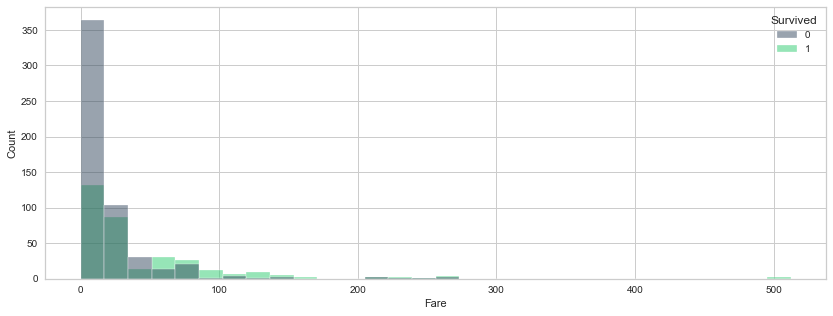

In [345]:
plt.figure(figsize=(14,5))
sns.histplot(data=train,x='Fare',hue='Survived',bins=30);


In [350]:
train.groupby(['Survived']).Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.000,22.118,31.388,0.000,7.854,10.500,26.000,263.000
1,342.000,48.395,66.597,0.000,12.475,26.000,57.000,512.329


In [351]:
train.Fare.isnull().sum()

0

In [354]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
152,1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S,Mr.


In [468]:
test.Fare = test.Fare.fillna(train[(train.Pclass==3)&(train.Embarked=='S')].Fare.mean())

In [443]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [469]:
train[['Fare','Survived']].groupby(['Fare']).mean()

,Survived
Fare,
0.000,0.067
4.013,0.000
5.000,0.000
6.237,0.000
6.438,0.000
...,...
227.525,0.750
247.521,0.500
262.375,1.000


In [470]:
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
print (train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

   CategoricalFare  Survived
0   (-0.001, 7.91]     0.197
1   (7.91, 14.454]     0.304
2   (14.454, 31.0]     0.455
3  (31.0, 512.329]     0.581


### Embarked

In [367]:
s_emb = train[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean()
s_emb

,Embarked,Survived
0,C,0.554
1,Q,0.390
2,S,0.337


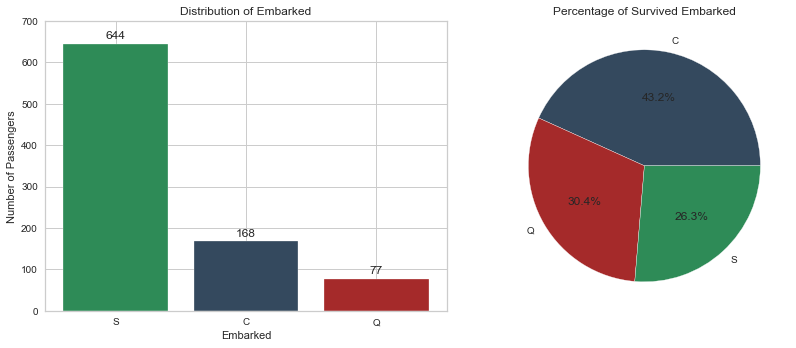

In [373]:
x_emb = train.Embarked.value_counts().index
y_emb = train.Embarked.value_counts().values

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
g = plt.bar(x_emb,y_emb,label='Embarked',color=['seagreen','#34495E', 'brown'])
plt.bar_label(g,padding=3),plt.ylim(0,700)
plt.xlabel('Embarked'),plt.ylabel('Number of Passengers')
plt.title('Distribution of Embarked')

plt.subplot(1,2,2)
plt.pie(s_emb.Survived,labels=s_emb.Embarked,colors=['#34495E','brown','seagreen'],
       autopct='%0.1f%%')
plt.title('Percentage of Survived Embarked')

plt.tight_layout()

In [375]:
train.groupby(['Embarked','Pclass']).Fare.describe()

count    mean    std    min    25%    50%     75%     max
Embarked Pclass                                                            
C        1       85.000 104.719 99.094 26.550 49.500 78.267 110.883 512.329
         2       17.000  25.358 11.345 12.000 13.863 24.000  37.004  41.579
         3       66.000  11.214  4.872  4.013  7.229  7.896  14.458  22.358
Q        1        2.000  90.000  0.000 90.000 90.000 90.000  90.000  90.000
         2        3.000  12.350  0.000 12.350 12.350 12.350  12.350  12.350
         3       72.000  11.183  6.722  6.750  7.750  7.750  10.219  29.125
S        1      127.000  70.365 58.811  0.000 29.250 52.000  83.475 263.000
         2      164.000  20.327 13.631  0.000 13.000 13.500  26.000  73.500
         3      353.000  14.644 13.277  0.000  7.854  8.050  16.100  69.550

In [374]:
train.Embarked.isnull().sum()

2

In [377]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CategoricalAge,Title
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80.000,B28,NaN,"(32.0, 48.0]",Miss.
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80.000,B28,NaN,"(48.0, 64.0]",Mrs.


In [471]:
train[(train.Pclass==1)&(train.Fare>78)&(train.Fare<83)].Embarked.value_counts()

C    8
S    6
Name: Embarked, dtype: int64

In [472]:
train.Embarked.fillna('C',inplace=True)

In [473]:
test.Embarked.isnull().sum()

0

### SibSp & Parch

In [474]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1     0.304
1           2     0.553
2           3     0.578
3           4     0.724
4           5     0.200
5           6     0.136
6           7     0.333
7           8     0.000
8          11     0.000


In [475]:
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0     0.506
1        1     0.304


In [396]:
test.Sex

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int32

### Data Cleansing and Converting

In [476]:
for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} )
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare']        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare']        = 3
    dataset['Fare'] = dataset['Fare']
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age']      = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4

# Feature Selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp',
                 'Parch', 'FamilySize']
train = train.drop(drop_elements, axis = 1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

test  = test.drop(drop_elements, axis = 1)

print (train.head(10))


   Survived  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone
0         0       3    1    1 0.000         0  0.000        0
1         1       1    0    2 3.000         1  0.000        0
2         1       3    0    1 1.000         0  0.000        1
3         1       1    0    2 3.000         0  0.000        0
4         0       3    1    2 1.000         0  0.000        1
5         0       3    1    1 1.000         2  0.000        1
6         0       1    1    3 3.000         0  0.000        1
7         0       3    1    0 2.000         0  0.000        0
8         1       3    0    1 1.000         0  0.000        0
9         1       2    0    0 2.000         1  0.000        0


In [484]:
train = train.values
test  = test.values

### Classifier Comparison

In [482]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

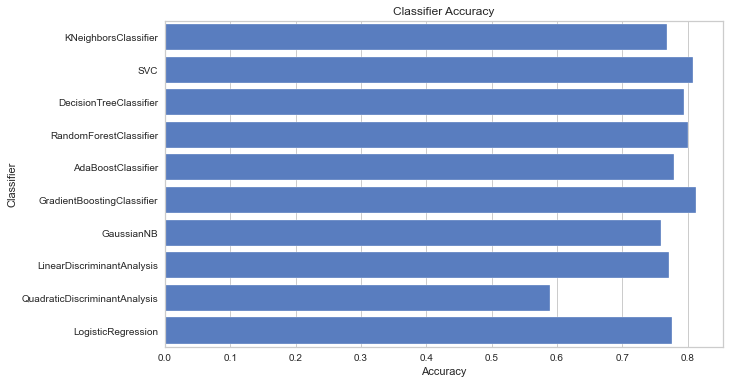

In [485]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = train[0::, 1::]
y = train[0::, 0]

acc_dict = {}

for train_index, test_index in sss.split(X, y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	
	for clf in classifiers:
		name = clf.__class__.__name__
		clf.fit(X_train, y_train)
		train_predictions = clf.predict(X_test)
		acc = accuracy_score(y_test, train_predictions)
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

## Prediction
We can use GradientBoostingClassifier.

In [492]:
model = GradientBoostingClassifier()
model.fit(train[0::,1::],train[0::,0])
result = model.predict(test)

In [493]:
result

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.